## BLIP Demo

In [17]:
# Required imports
import torch
from PIL import Image
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration, BlipForQuestionAnswering
from transformers import BlipProcessor, BlipForImageTextRetrieval
import matplotlib.pyplot as plt

#### Helper Functions

In [19]:
def load_local_image(image_path):
    """Load and preprocess image from local path"""
    try:
        image = Image.open(image_path)
        return image
    except Exception as e:
        print(f"Error loading image from {image_path}: {str(e)}")
        return None

In [20]:
def display_image(image):
    """Display image using matplotlib"""
    plt.figure(figsize=(6, 4))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

#### Image Captioning Demo

In [21]:
# Initialize captioning model
processor_caption = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model_caption = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [22]:
def generate_caption(image, use_nucleus=True):
    """Generate caption for image with option for nucleus sampling"""
    inputs = processor_caption(image, return_tensors="pt")
    
    if use_nucleus:
        # Using nucleus sampling for more diverse captions
        output = model_caption.generate(**inputs, num_beams=3, num_return_sequences=1,
                                     max_length=20, top_p=0.9, temperature=0.7)
    else:
        # Using beam search
        output = model_caption.generate(**inputs, num_beams=3, num_return_sequences=1,
                                     max_length=20)
    
    caption = processor_caption.decode(output[0], skip_special_tokens=True)
    return caption

#### Visual Question Answering Demo

In [23]:
# Initialize VQA model
processor_vqa = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model_vqa = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

In [24]:
def answer_question(image, question):
    """Answer question about the image"""
    inputs = processor_vqa(image, question, return_tensors="pt")
    output = model_vqa.generate(**inputs, max_length=20)
    answer = processor_vqa.decode(output[0], skip_special_tokens=True)
    return answer

#### Image-Text Retrieval Demo

In [25]:
# Initialize retrieval model
processor_retrieval = BlipProcessor.from_pretrained("Salesforce/blip-itm-base-coco")
model_retrieval = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

In [26]:
def check_image_text_match(image, text):
    """Check if image and text match"""
    inputs = processor_retrieval(image, text, return_tensors="pt")
    outputs = model_retrieval(**inputs)
    itm_score = torch.nn.functional.softmax(outputs.itm_score, dim=1)
    match_probability = itm_score[:, 1].item()  # Probability of match
    return match_probability

#### Demo with Example Images



######################################################################
Testing Category: LANDSCAPES
######################################################################

Analyzing image: Data/Mountain.jpeg
Category: landscapes


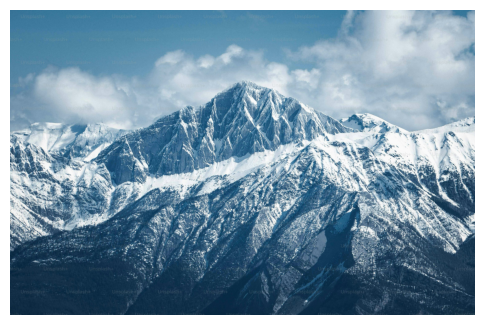


1. Image Captioning:
------------------------------
Nucleus Sampling: a mountain range with snow covered mountains in the background
Beam Search: a mountain range with snow covered mountains in the background

2. Visual Question Answering:
------------------------------
Q: What type of landscape is this?
A: mountains

Q: What weather conditions can you see?
A: cloudy

Q: What time of day does it appear to be?
A: morning


3. Image-Text Matching:
------------------------------
Text: 'A natural outdoor scene'
Match probability: 14.39%

Text: 'A scenic landscape view'
Match probability: 23.14%

Text: 'Mountains and sky'
Match probability: 63.18%


Analyzing image: Data/River.jpeg
Category: landscapes


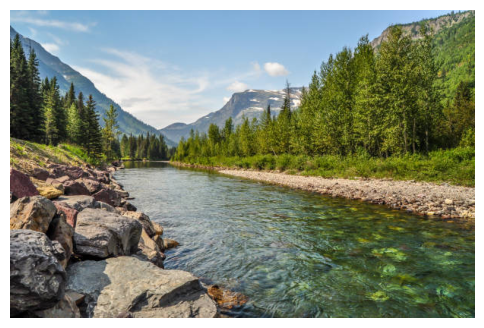


1. Image Captioning:
------------------------------
Nucleus Sampling: a river in the mountains
Beam Search: a river in the mountains

2. Visual Question Answering:
------------------------------
Q: What type of landscape is this?
A: mountainous

Q: What weather conditions can you see?
A: partly cloudy

Q: What time of day does it appear to be?
A: afternoon


3. Image-Text Matching:
------------------------------
Text: 'A natural outdoor scene'
Match probability: 19.56%

Text: 'A scenic landscape view'
Match probability: 42.46%

Text: 'Mountains and sky'
Match probability: 41.25%



######################################################################
Testing Category: OBJECTS
######################################################################

Analyzing image: Data/Cup.jpeg
Category: objects


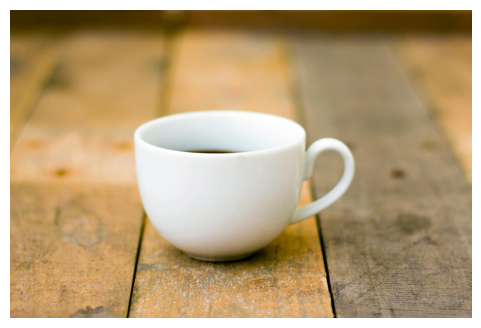


1. Image Captioning:
------------------------------
Nucleus Sampling: a white cup sitting on top of a wooden table
Beam Search: a white cup sitting on top of a wooden table

2. Visual Question Answering:
------------------------------
Q: What is the main object in this image?
A: coffee cup

Q: What color is it?
A: white

Q: Describe its appearance in detail.
A: wood grain


3. Image-Text Matching:
------------------------------
Text: 'A single object in focus'
Match probability: 33.85%

Text: 'A household item'
Match probability: 15.51%

Text: 'An animal or pet'
Match probability: 0.25%


Analyzing image: Data/Apple.jpeg
Category: objects


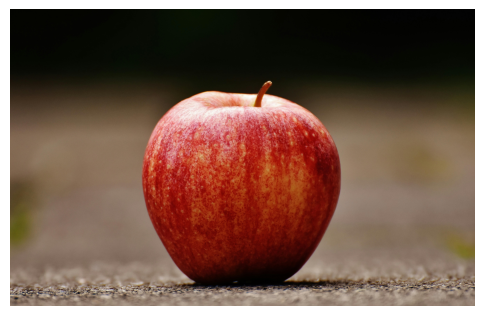


1. Image Captioning:
------------------------------
Nucleus Sampling: a red apple sitting on the ground
Beam Search: a red apple sitting on the ground

2. Visual Question Answering:
------------------------------
Q: What is the main object in this image?
A: apple

Q: What color is it?
A: red

Q: Describe its appearance in detail.
A: apple


3. Image-Text Matching:
------------------------------
Text: 'A single object in focus'
Match probability: 35.25%

Text: 'A household item'
Match probability: 4.77%

Text: 'An animal or pet'
Match probability: 0.21%



######################################################################
Testing Category: COMPLEX_SCENES
######################################################################

Analyzing image: Data/Market.jpeg
Category: complex_scenes


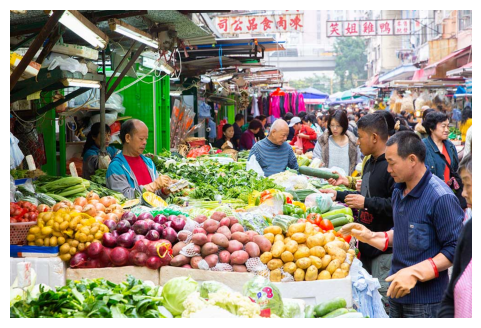


1. Image Captioning:
------------------------------
Nucleus Sampling: a group of people walking around a market
Beam Search: a group of people walking around a market

2. Visual Question Answering:
------------------------------
Q: What are the main elements in this scene?
A: vegetables

Q: What activities are taking place?
A: shopping

Q: Describe the overall atmosphere.
A: busy


3. Image-Text Matching:
------------------------------
Text: 'A busy urban scene'
Match probability: 14.10%

Text: 'Many people and objects'
Match probability: 2.62%

Text: 'An artistic composition'
Match probability: 1.29%


Analyzing image: Data/City.jpeg
Category: complex_scenes


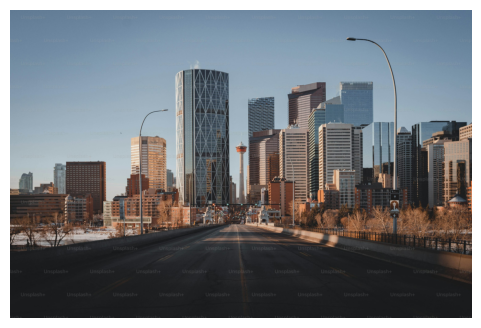


1. Image Captioning:
------------------------------
Nucleus Sampling: a view of a city with tall buildings
Beam Search: a view of a city with tall buildings

2. Visual Question Answering:
------------------------------
Q: What are the main elements in this scene?
A: buildings

Q: What activities are taking place?
A: driving

Q: Describe the overall atmosphere.
A: urban


3. Image-Text Matching:
------------------------------
Text: 'A busy urban scene'
Match probability: 3.76%

Text: 'Many people and objects'
Match probability: 0.46%

Text: 'An artistic composition'
Match probability: 11.70%



In [27]:
# Example usage
if __name__ == "__main__":
    # Categories and test scenarios
    image_categories = {
        "landscapes": ["images/data/Mountain.jpeg", "images/data/River.jpeg"],
        "objects": ["images/data/Cup.jpeg", "images/data/Apple.jpeg"],
        "complex_scenes": ["images/data/Market.jpeg", "images/data/City.jpeg"]
    }

    # Category-specific questions
    category_questions = {
        "landscapes": [
            "What type of landscape is this?",
            "What weather conditions can you see?",
            "What time of day does it appear to be?"
        ],
        "objects": [
            "What is the main object in this image?",
            "What color is it?",
            "Describe its appearance in detail."
        ],
        "complex_scenes": [
            "What are the main elements in this scene?",
            "What activities are taking place?",
            "Describe the overall atmosphere."
        ]
    }

    # Category-specific texts for matching
    category_texts = {
        "landscapes": [
            "A natural outdoor scene",
            "A scenic landscape view",
            "Mountains and sky"
        ],
        "objects": [
            "A single object in focus",
            "A household item",
            "An animal or pet"
        ],
        "complex_scenes": [
            "A busy urban scene",
            "Many people and objects",
            "An artistic composition"
        ]
    }

    def run_blip_analysis(image_path, category):
        """Run complete BLIP analysis for a single image"""
        print(f"\n{'='*50}")
        print(f"Analyzing image: {image_path}")
        print(f"Category: {category}")
        print('='*50)

        # Load and display image
        image = load_local_image(image_path)
        if image is None:
            print(f"Skipping analysis for {image_path} due to loading error")
            return

        display_image(image)

        # Generate captions
        print("\n1. Image Captioning:")
        print("-" * 30)
        print("Nucleus Sampling:", generate_caption(image, use_nucleus=True))
        print("Beam Search:", generate_caption(image, use_nucleus=False))

        # Visual Question Answering
        print("\n2. Visual Question Answering:")
        print("-" * 30)
        for question in category_questions[category]:
            answer = answer_question(image, question)
            print(f"Q: {question}")
            print(f"A: {answer}\n")

        # Image-Text Matching
        print("\n3. Image-Text Matching:")
        print("-" * 30)
        for text in category_texts[category]:
            match_score = check_image_text_match(image, text)
            print(f"Text: '{text}'")
            print(f"Match probability: {match_score:.2%}\n")

    # Run analysis for each category and image
    for category, image_paths in image_categories.items():
        print(f"\n\n{'#'*70}")
        print(f"Testing Category: {category.upper()}")
        print(f"{'#'*70}")
        
        for image_path in image_paths:
            try:
                run_blip_analysis(image_path, category)
            except Exception as e:
                print(f"Error processing {image_path}: {str(e)}")
                continue